# Ejercicio 4: Asortatividad

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from scipy.optimize import curve_fit
from IPython.display import Image
import os

def lineal(x, a, b):
    return a*x + np.log10(b)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Analisis previos
En este primer paso leemos la red que queremos analizar y eliminamos aquellos nodos que se encuentran aislados si los hubiese. Además tratamos de visualizar la red y su componente gigante, y para este análisis sobre asortatividad de grado, pintamos los nodos de a cuerdo a su grado para luego analizar los resultados y comparar.

In [66]:
# Leemos el archivo
myFolder=(os.getcwd()+'/tc01_data/') #busca en el directorio actual

# Primero creamos la red: 
colab = nx.read_gml(myFolder+'netscience.gml')
#net= nx.read_gml(myFolder+'as-22july06.gml')


In [67]:
#eliminamos nodos aislados:
aislados=list(nx.isolates(colab))
colab.remove_nodes_from(aislados)

#Matriz de Adjacencia Aij:
C_adj = nx.to_numpy_matrix(colab) 
#N_adj = nx.to_numpy_matrix(net)

nodos = colab.number_of_nodes()
#nodosN = net.number_of_nodes()

In [ ]:
#Grafico: Toda la red
plt.figure(1)
pos = nx.spring_layout(colab)
nodes=nx.draw_networkx_nodes(colab,pos,cmap=plt.get_cmap('Dark2'),node_color=list(dict(colab.degree).values()),width=0.5,node_size=20,with_labels=False) 
edges=nx.draw_networkx_edges(colab,pos,edge_color='k',width=0.1)
#nx.draw_networkx_labels(colab,pos,font_size=5)
plt.sci(nodes)
plt.colorbar()
plt.title('Red netscience por grados \n Componente gigante')
plt.show()

#Grafico: componente gigante

plt.figure(2)
giant = max(nx.connected_component_subgraphs(colab), key=len)
pos = nx.spring_layout(giant)
nodes=nx.draw_networkx_nodes(giant,pos,cmap=plt.get_cmap('Dark2'),node_color=list(dict(giant.degree).values()),width=0.5,node_size=20,with_labels=False) 
edges=nx.draw_networkx_edges(giant,pos,edge_color='k',width=0.1)
#nx.draw_networkx_labels(giant,pos,font_size=5)
plt.sci(nodes)
plt.colorbar()
plt.title('Red netscience por grados \n Componente gigante')
plt.show()

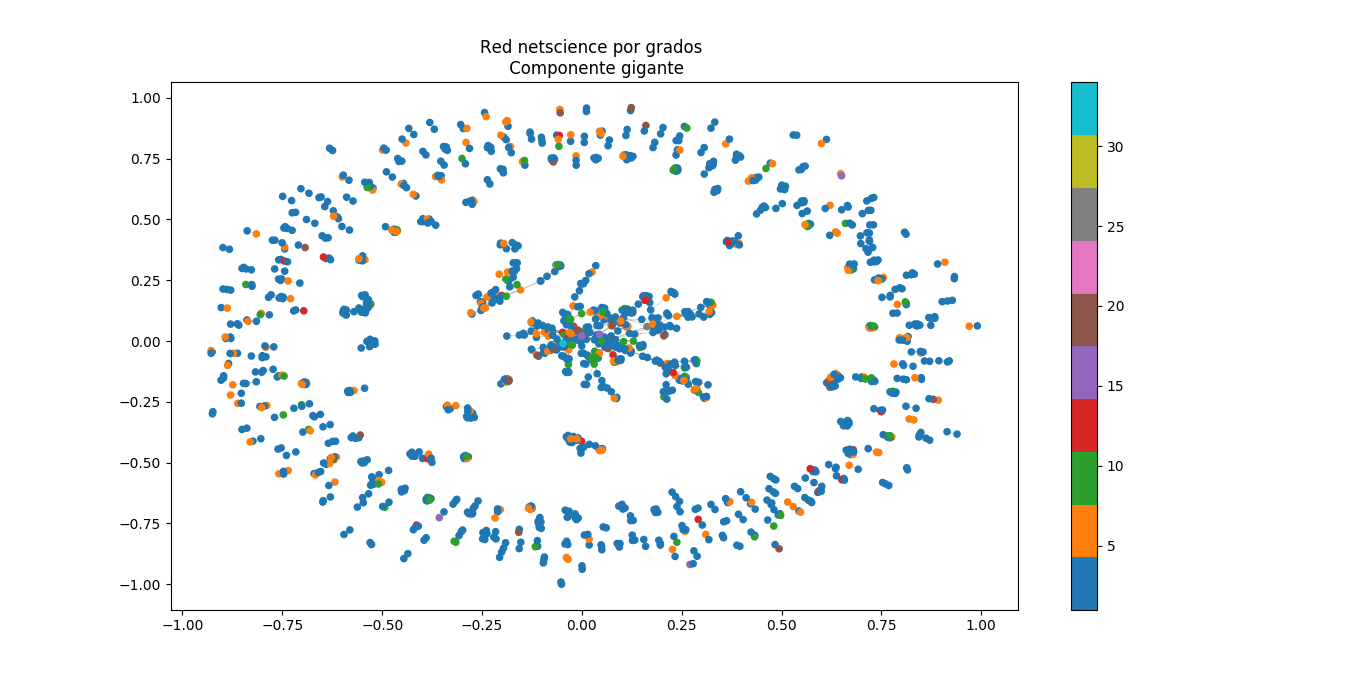

In [2]:
Image(filename='Red_netscience/Red netscience.png')


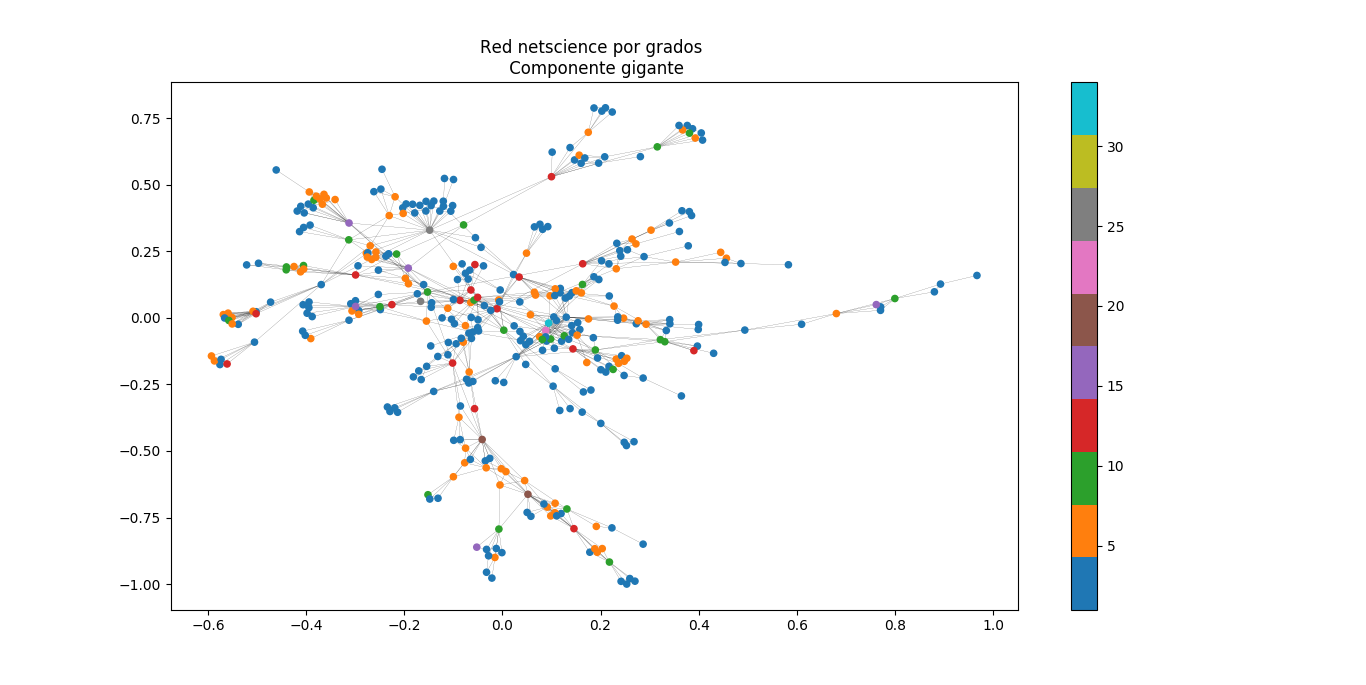

In [3]:
Image(filename='Red_netscience/Red netscience-cg.png')

 Lo primero que podemos observar en esta red parece ser una tendencia de los nodos de bajo grado(nodos azules) a conectarse con otros nodos de bajo grado también azules. Lo mismo para los nodos naranja. Sin embargo también se observan algunas zonas con una estructura más a la del tipo "estrella" donde nodos de alto grado se conectan con nodos de bajo grado, por ejemplo, nodos grises o que se conectan con muchos nodos azules.

# Análisis de Asortatividad por grado
Para analizar más en detalle la asortatividad por grado de la red vamos a calcular por un lado el exponente de correlación mu (criterio de Barabasi) y luego el estimador r (criterio de Newman).

In [68]:
# i) Grado medio de los vecinos
# k_nodo es el vector de grado de cada nodo
k_nodo= [val for (node, val) in colab.degree()]

# knn_nodo es el valor del grado promedio de vecinos de cada nodo
knn_nodo=np.zeros(len(k_nodo))

for i in range(len(k_nodo)):
        knn_nodo[i] = np.dot(np.array(C_adj[i,:]), np.array(k_nodo)) / int(k_nodo[i])
        #k_nodo[i] numero de vecinos propios para promediar

In [69]:
# ii)Grafico de knn en funcion del grado k:
# Podemos realizar los ajustes considerando todos los puntos (hay varios valores de k medio de vecinos para cada k)
# o tambien podemos promediar todos los valores para cada grado:

# Ordenamos el knn_nodo en funcion del key del k_nodo
knn_nodo = [x for _,x in sorted(zip(k_nodo,knn_nodo))]
knn_nodo = np.array(knn_nodo) 

# Ordenamos el k_nodo
k_nodo=np.sort(k_nodo)

# k es el vector de grados
k = np.unique(k_nodo)
knn = np.zeros(len(k))
knn_error = np.zeros(len(k))

# Creamos el vector de k medio de vecinos promediado y también su error
for i,j in enumerate(k):
    v = np.where(k_nodo==j)
    knn[i] = np.mean(knn_nodo[v])
    knn_error[i] = np.std(knn_nodo[v],ddof=1)
    #ddof=significa degree of freedom en el calculo de la desviacion standar.
    #Creo que es mejor con ddof=1 porque si es un solo valor(el error no estaria definido)
    #y entonces asigna correctamente nan como error en vez de error 0 lo cual no estaria bien.         
    


/home/danilo/.local/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/danilo/.local/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [72]:
#iii) Ajuste: con funcion log(knn)=mu*(logk)+log(b)

# Ajuste 1: usando los puntos rojos (todos los datos)
parametros1=curve_fit(lineal,np.log10(k_nodo),np.log10(knn_nodo))[0]
mu1=parametros1[0]
b1=parametros1[1]
intercept1=np.log10(b1)

print ('Ajuste rojo')
print ('exponente = {0:.3f}'.format(mu1))
print ('intercept = {0:.3f}'.format(intercept1))
print('\n')


xfit1=np.linspace(1,40,1000)
yfit1=(b1)*(xfit1**mu1)

# Ajuste 2: usando los puntos azules (los promediados)

parametros2=curve_fit(lineal,np.log10(k),np.log10(knn))[0]
mu2=parametros2[0]
b2=parametros2[1]
intercept2=np.log10(b2)

print ('Ajuste azul')
print ('exponente = {0:.3f}'.format(mu2))
print ('intercept = {0:.3f}'.format(intercept2))
print('\n')

xfit2=np.linspace(1,40,1000)
yfit2=(b2)*(xfit2**mu2)

# Ajuste 3: usando los puntos azules del grafico knn(k) y usando tambien el error:
# Para el ajuste con errores me quedo con puntos que tengan knn_error != nan
nonan_positions=[i for i,j in enumerate(knn_error) if np.invert(np.isnan(j))==True]
knn_error=knn_error[nonan_positions]
knn_fit=knn[nonan_positions]
k_fit=k[nonan_positions]

parametros3=curve_fit(lineal,np.log10(k_fit),np.log10(knn_fit),sigma=(1/np.log(10))*(1/knn_fit)*knn_error)[0]
mu3=parametros3[0]
b3=parametros3[1]
intercept3=np.log10(b3)

print ('Ajuste puntos azules con errores')
print ('exponente = {0:.3f}'.format(mu3))
print ('intercept = {0:.3f}'.format(intercept3))
print('\n')


xfit3=np.linspace(1,40,1000)
yfit3=(b3)*(xfit2**mu3)

Ajuste rojo
exponente = 0.708
intercept = 0.256


Ajuste azul
exponente = 0.306
intercept = 0.551


Ajuste puntos azules con errores
exponente = 0.532
intercept = 0.348




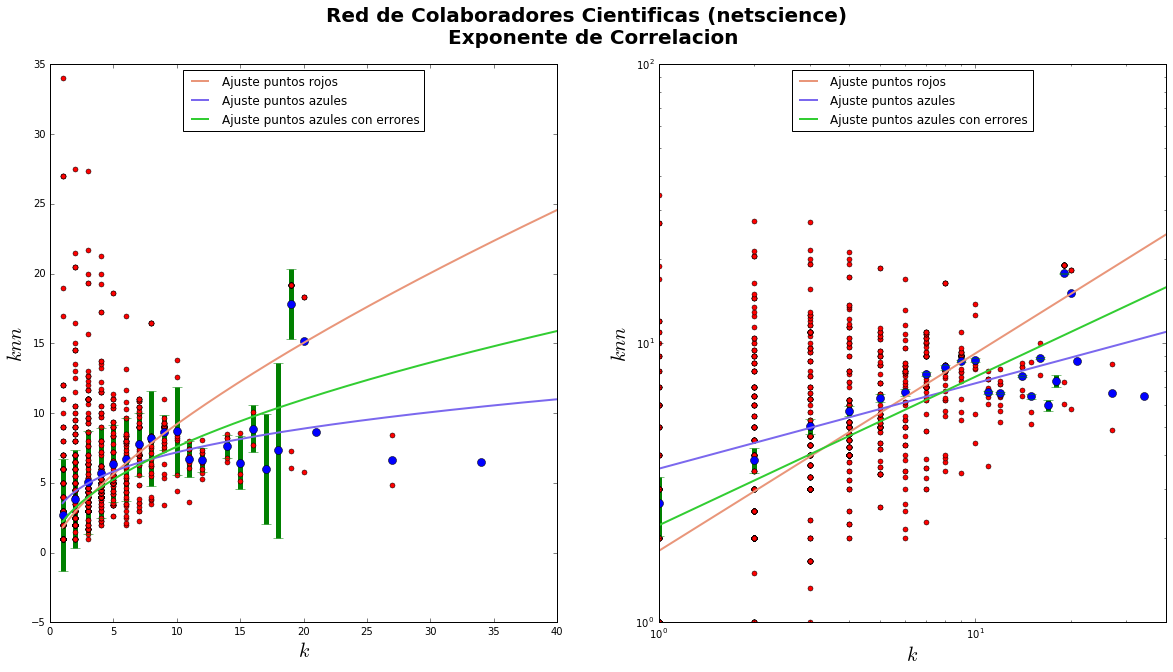

In [73]:
# Graficos
plt.figure(figsize=(20,10))
plt.suptitle('Red de Colaboradores Cientificas (netscience) \n Exponente de Correlacion',size=20,fontweight="bold")
plt.subplot(1,2,1)

#Puntos rojos
plt.plot(k_nodo,knn_nodo,'ro',markersize=5)

#Puntos azules
plt.plot(k,knn,'bo',markersize=8)

#Puntos azules con barra de error=desv standar
plt.errorbar(k_fit,knn_fit,knn_error,fmt=' ',ecolor='green',elinewidth=5,capsize=5,markersize=3)

#Ajustes:
plt.plot(xfit1,yfit1,color='darksalmon',label='Ajuste puntos rojos',linewidth=2)
plt.plot(xfit2,yfit2,color='mediumslateblue',label='Ajuste puntos azules',linewidth=2)
plt.plot(xfit3,yfit3,color='limegreen',label='Ajuste puntos azules con errores',linewidth=2)

#Propiedades grafico:
plt.xlabel('$k$',fontsize=20)
plt.ylabel('$knn$',fontsize=20)
plt.xlim(0,40)
#plt.title('Red de Colaboradores Cientificas (netscience) \n Exponente de Correlacion',size=15,fontweight="bold")
plt.legend(loc='upper center')


plt.subplot(1,2,2)
#Puntos rojos
plt.plot(k_nodo,knn_nodo,'ro',markersize=5)

#Puntos azules
plt.plot(k,knn,'bo',markersize=8)

#Puntos azules con barra de error=desv standar
plt.errorbar(k_fit,knn_fit,(1/np.log(10))*(1/knn_fit)*knn_error,fmt=' ',ecolor='green',elinewidth=5,capsize=5,markersize=3)

#Ajustes:
plt.plot(xfit1,yfit1,color='darksalmon',label='Ajuste puntos rojos',linewidth=2)
plt.plot(xfit2,yfit2,color='mediumslateblue',label='Ajuste puntos azules',linewidth=2)
plt.plot(xfit3,yfit3,color='limegreen',label='Ajuste puntos azules con errores',linewidth=2)

#Propiedades grafico:
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k$',fontsize=20)
plt.ylabel('$knn$',fontsize=20)
plt.xlim(0,40)
#plt.title('Red de Colaboradores Cientificas (netscience) \n Exponente de Correlacion Escala log',size=15,fontweight="bold")
plt.legend(loc='upper center')

plt.show()


In [74]:
#iv)Asortividad con estimador de Newman:
# Segun libro de Newman se puede calcular r de la siguiente forma:
# r=(S1*Se-S2**2)/(S1*S3-S2**2)

S1 = np.sum(k_nodo)
S2 = np.sum(k_nodo**2)
S3 = np.sum(k_nodo**3)

se = 0
enlaces=list(colab.edges())
for i,e in enumerate(enlaces):
    se = se+colab.degree(enlaces[i][0])*colab.degree(enlaces[i][1])
Se = 2*se

r = (S1*Se-S2**2)/float(S1*S3-S2**2)

print ('Asortatividad Barabasi (mu) = {0:.3f}'.format(mu3))
print ('Asortatividad Newman (r) = {0:.3f}'.format(r))

Asortatividad Barabasi (mu) = 0.532
Asortatividad Newman (r) = 0.462


# Red de internet 22july06


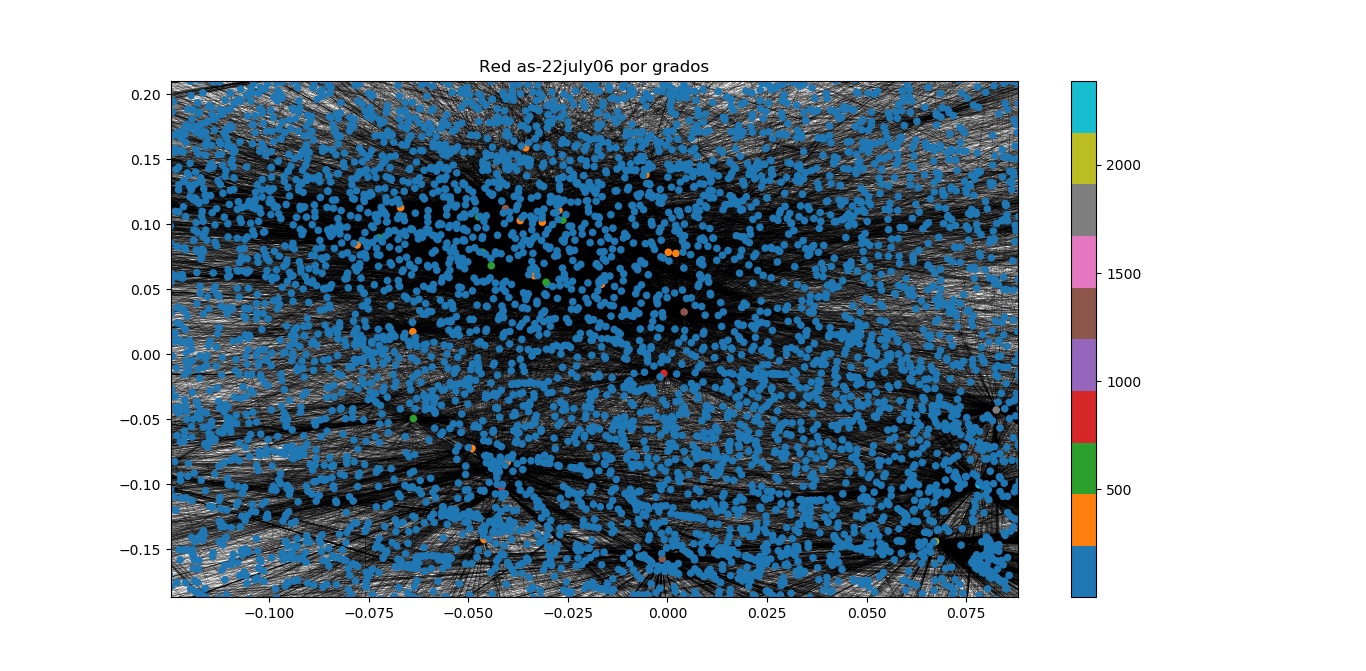

In [62]:
Image(filename='Red_22july06/Red 22july06-zoom4.png')

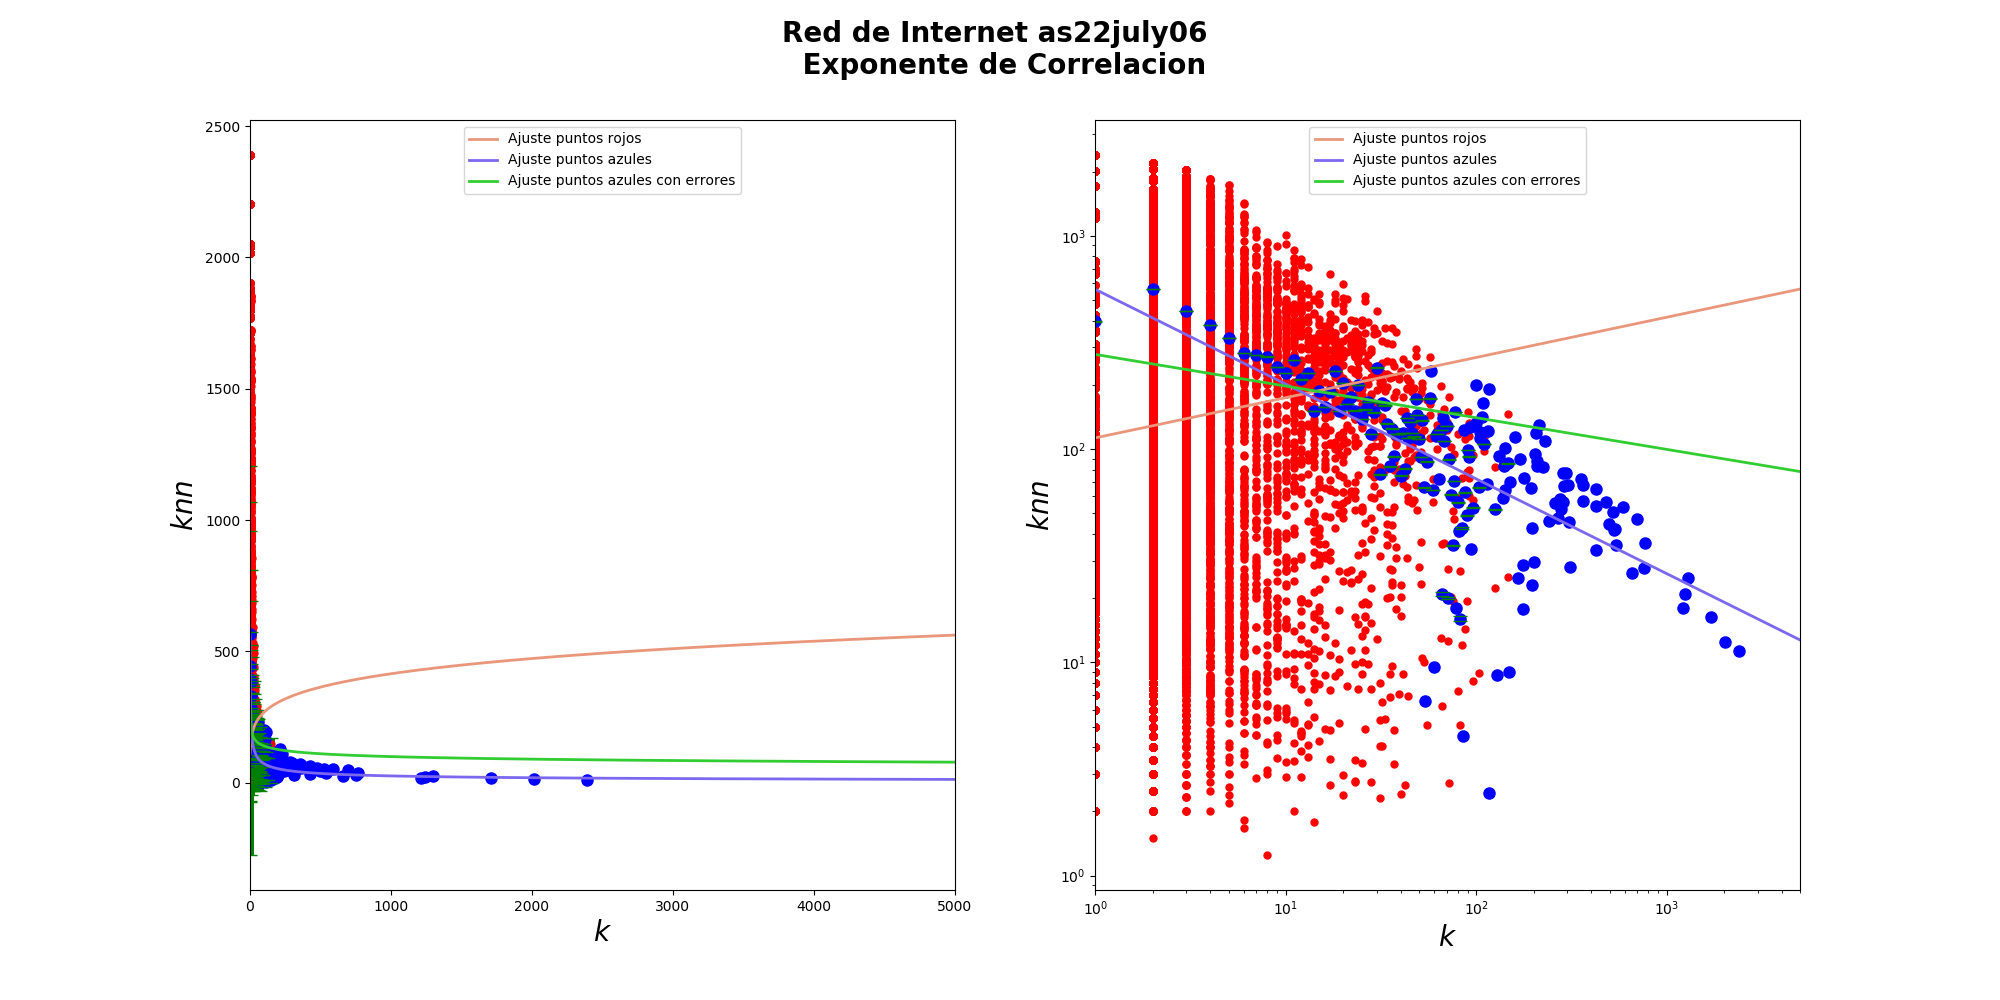

In [64]:
Image(filename='Red_22july06/Red 22july06-Asortatividad.png')

Ajuste rojo---->
exponente = 0.188
intercept = 2.052


Ajuste azul---->
exponente = -0.444
intercept = 2.748


Ajuste puntos azules con errores---->
exponente = -0.1484
intercept = 2.443

Asortatividad Barabasi (mu) = -0.148

Asortatividad Newman (r) = -0.392

# b) Asortatividad para red de proteínas

El mismo script fue corrido para las redes de proteínas Y2H y AP-MS. Presentamos los graficos de las componentes gigantes de las redes y luego las asortividades.

# Red de proteinas Y2H:


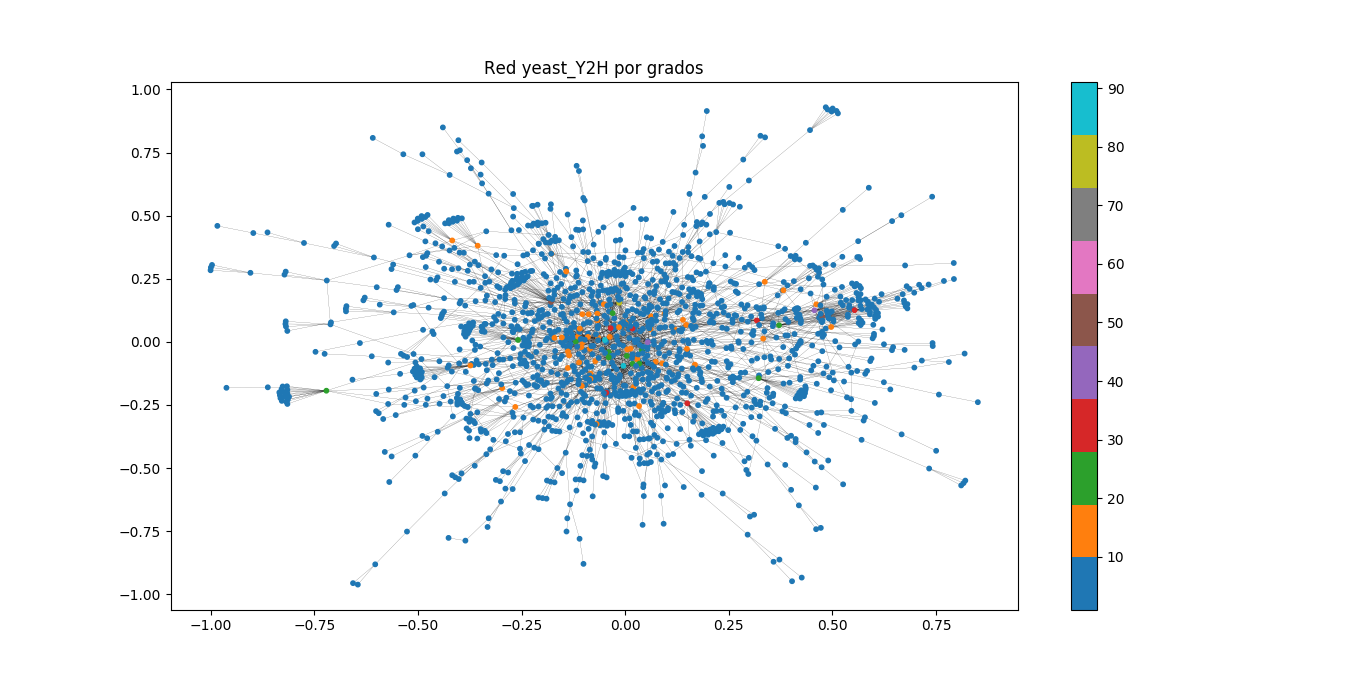

In [56]:
Image(filename='Red_Y2H/Red Y2H-cg.png')

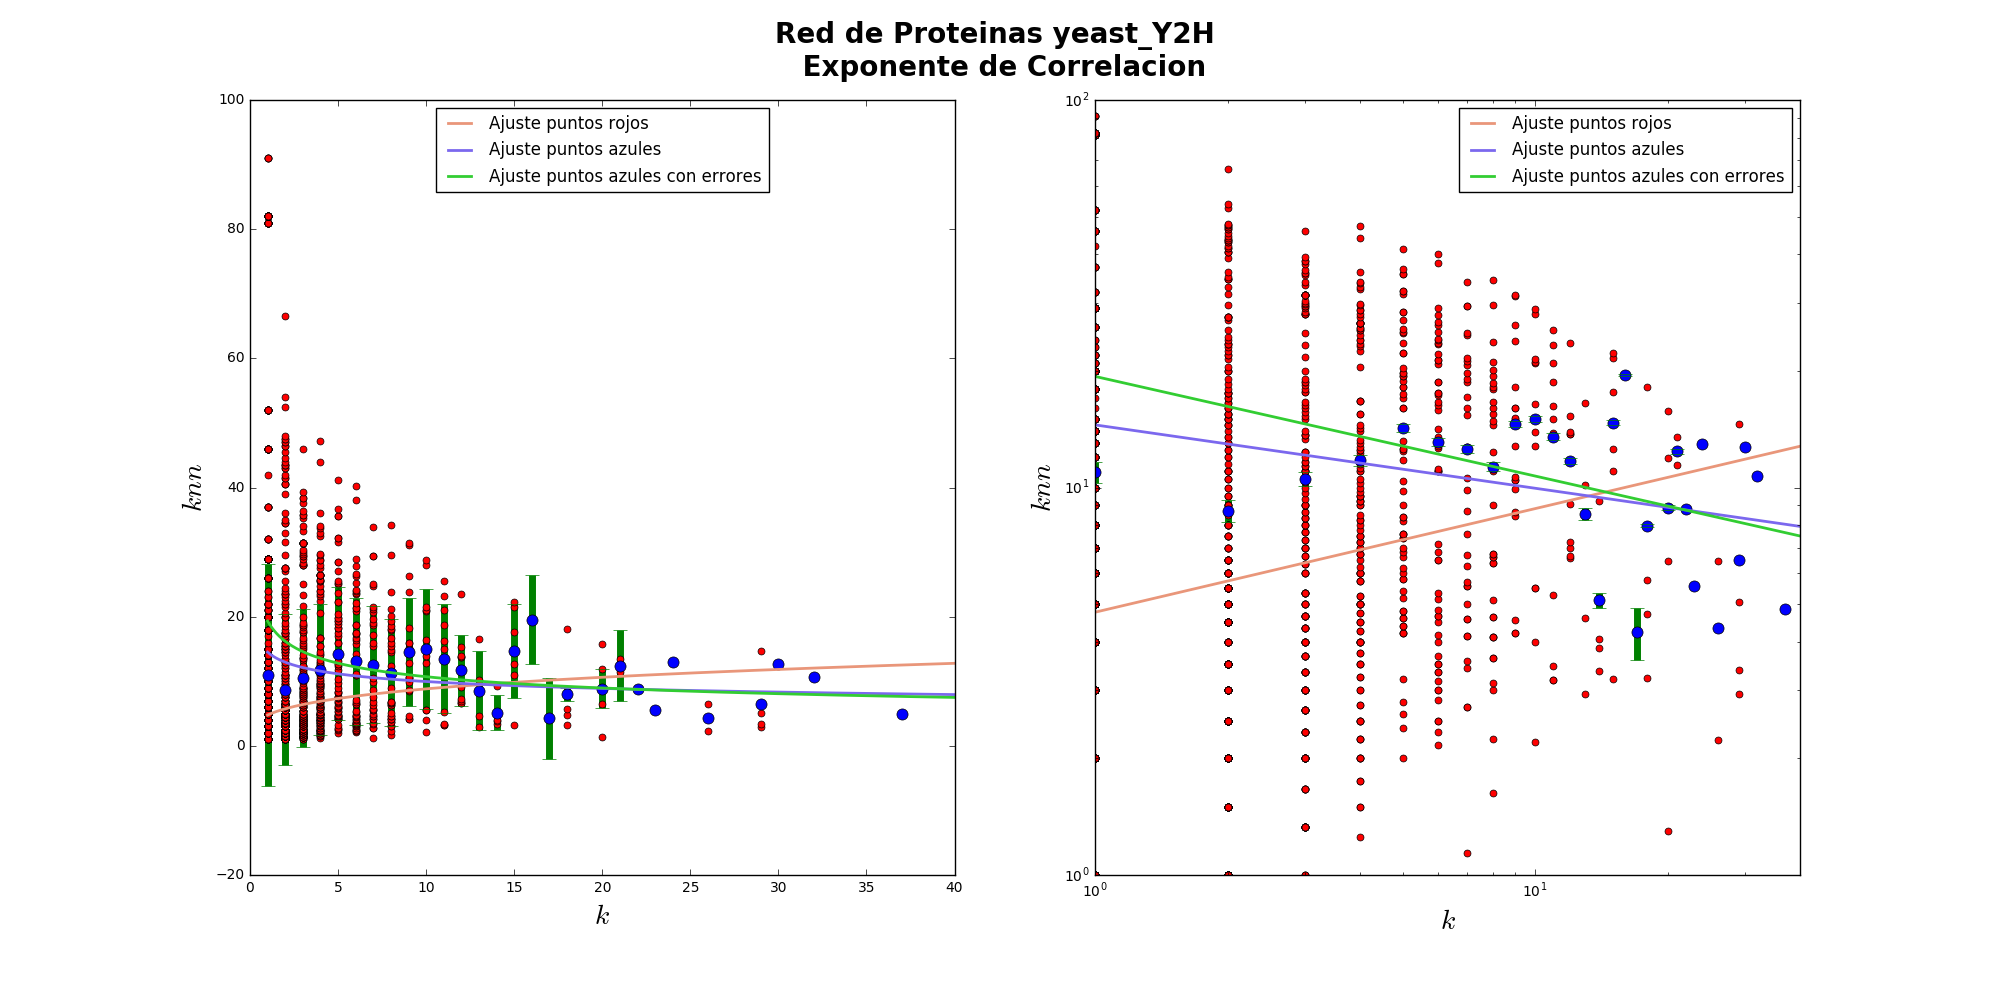

In [75]:
Image(filename='Red_Y2H/Red Y2H-Asortatividad.png')

Ajuste rojo---->
exponente = 0.267
intercept = 0.678


Ajuste azul---->
exponente = -0.163
intercept = 1.161


Ajuste puntos azules con errores---->
exponente = -0.257
intercept = 1.286

Asortatividad Barabasi (mu) = -0.257

Asortatividad Newman (r) = -0.041


# Red de proteinas AP-MS:

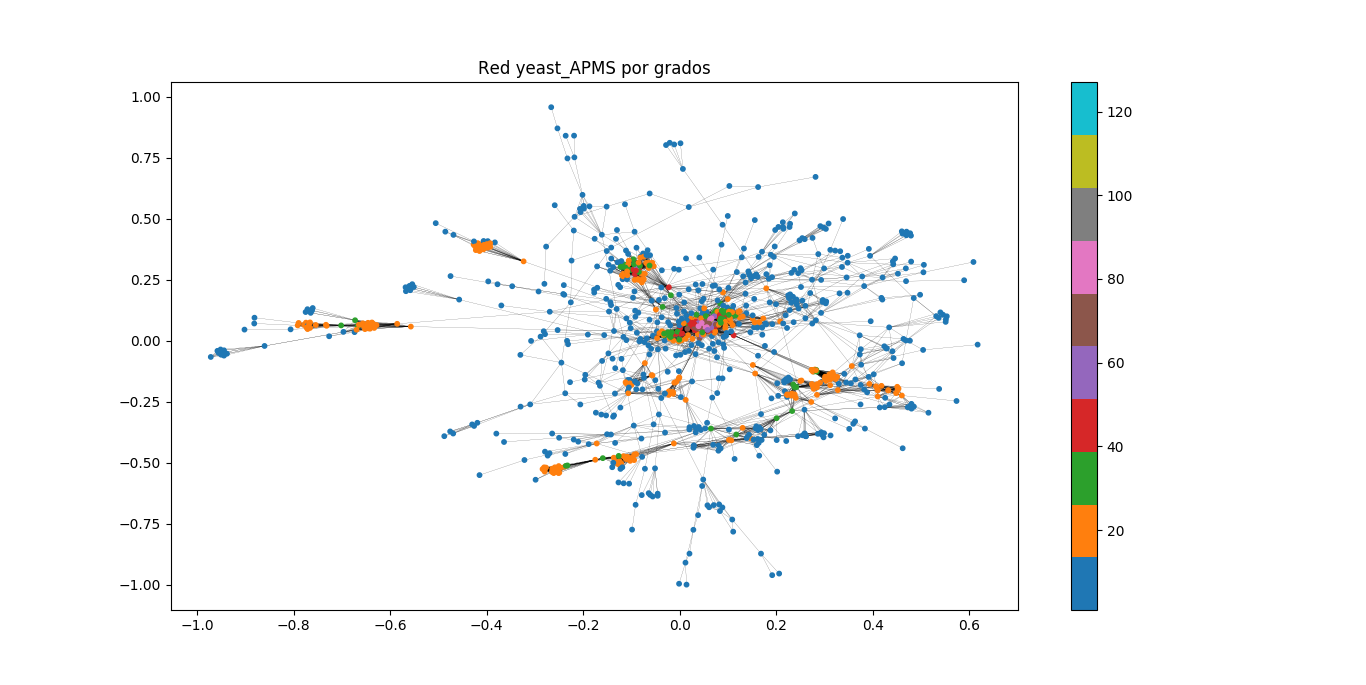

In [57]:
Image(filename='Red_APMS/Red AP-MS-cg.png')

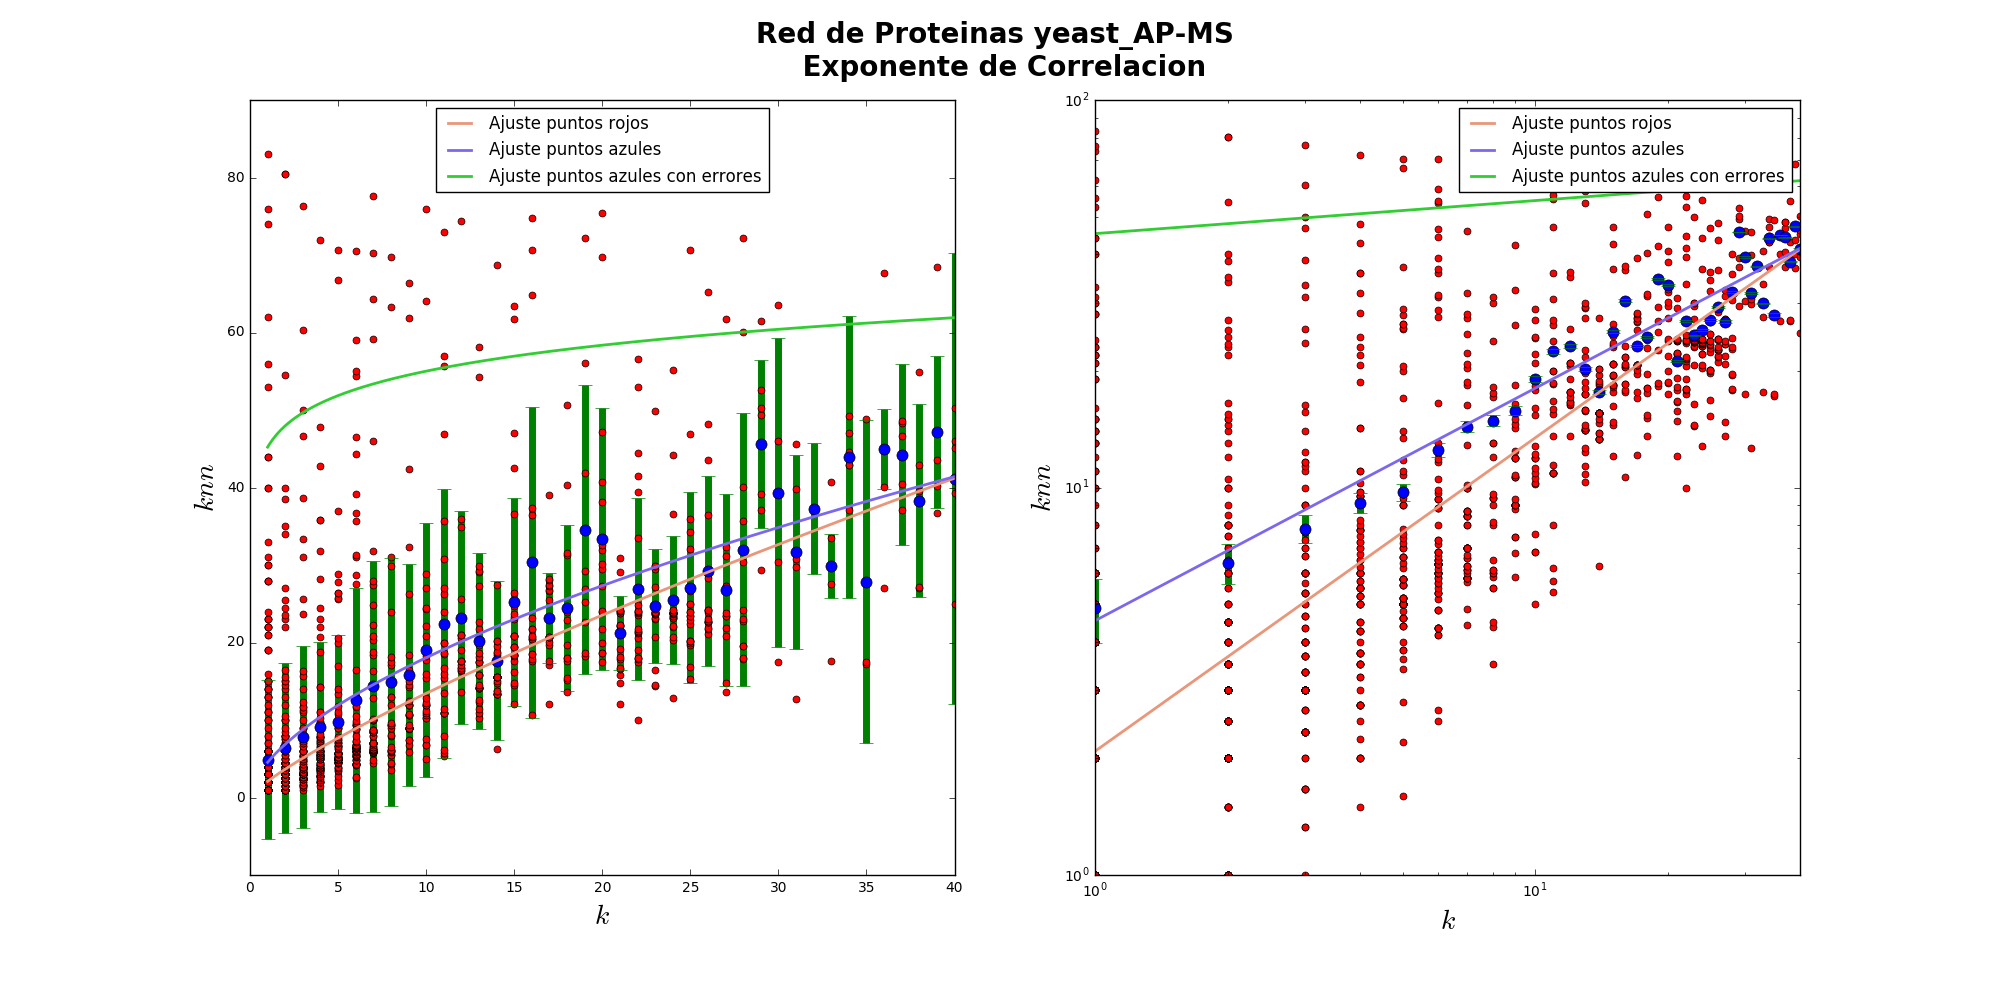

In [76]:
Image(filename='Red_APMS/Red AP-MS-Asortatividad.png')

Ajuste rojo---->
exponente = 0.808
intercept = 0.320


Ajuste azul---->
exponente = 0.599
intercept = 0.657


Ajuste puntos azules con errores---->
exponente = 0.085
intercept = 1.655

Asortatividad Barabasi (mu) = 0.599

Asortatividad Newman (r) = 0.605

# Resumen de resultados





In [7]:
haytabla = pd.DataFrame({"Red":["Netscience","Internet-22july06","Y2H","AP-MS"],
                    "Asortatividad mu (Barabasi)":[0.532,-0.148,-0.257,0.599],
                     "Asortatividad r (Newman)":[0.462,-0.392,-0.041,0.605]
                   })
print(haytabla)

   Asortatividad mu (Barabasi)  Asortatividad r (Newman)                Red
0                        0.532                     0.462         Netscience
1                       -0.148                    -0.392  Internet-22july06
2                       -0.257                    -0.041                Y2H
3                        0.599                     0.605              AP-MS


Con respecto a la red de Netscience, los coeficientes mu y r nos muestran que se trata de una red Asortativa respecto al grado mientras que la red de Internet es del tipo Disortativa. Si volvemos sobre la red de internet esto se puede explicar en la presencia de hubs los cuales poseen alto grado y se conectan con nodos de bajo grado(nodos azules).

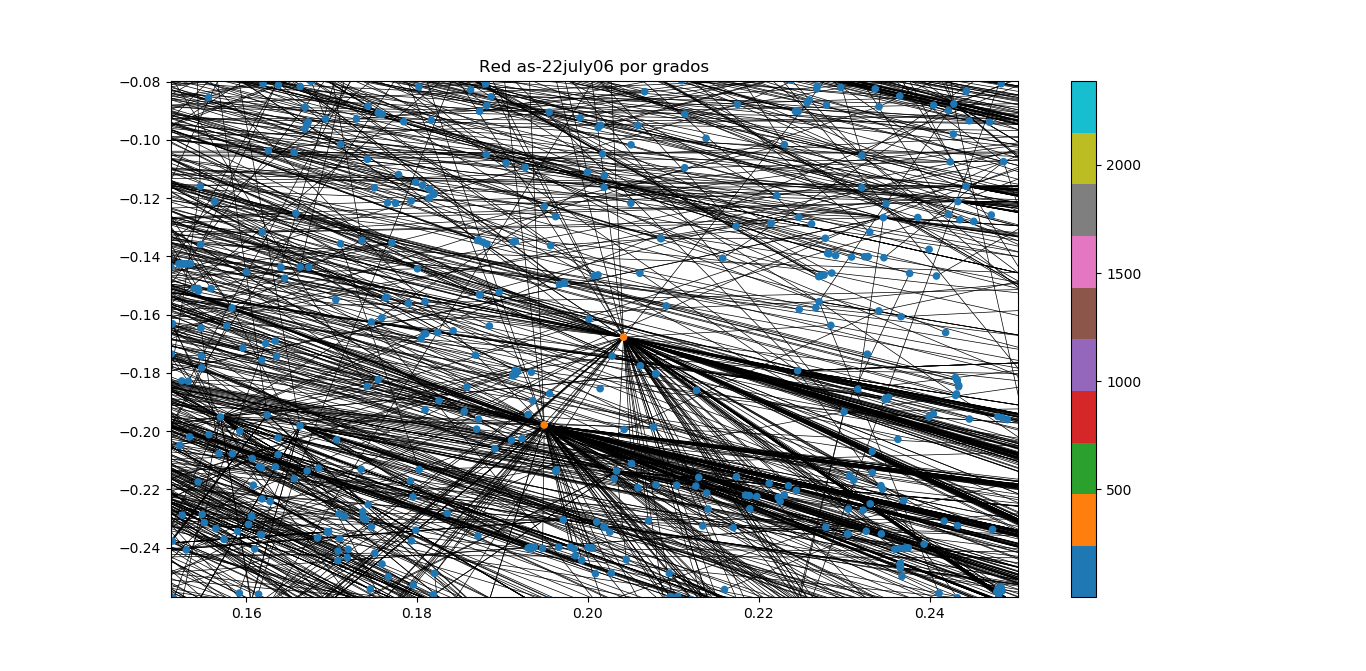

In [8]:
Image(filename='Red_22july06/Red 22july06 zoom.png')

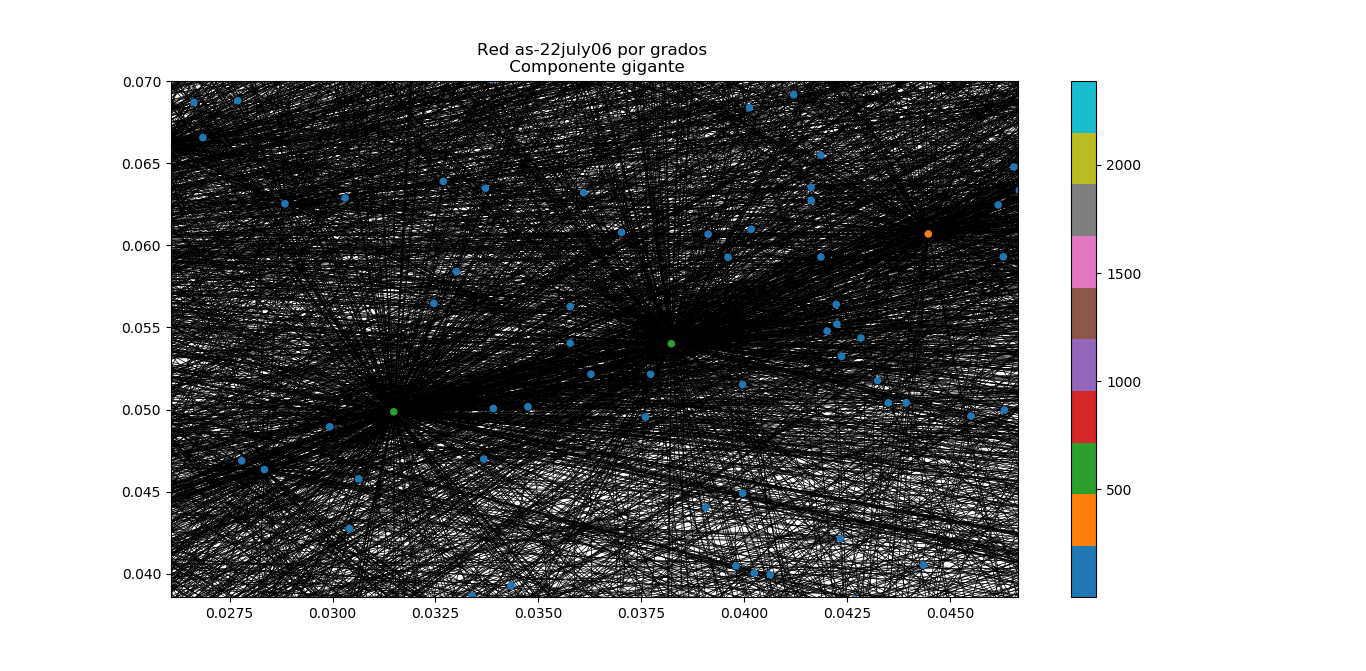

In [9]:
Image(filename='Red_22july06/Red 22july06-cg-zoom.png')

Si ahora analizamos la red de proteinas vemos que la red Y2H parece tener un comportamiento Disortativo segun el criterio de Barabasi aunque el coeficiente de Newman si bien es negativo es mas cercano a cero. Podemos ver en los siguientes graficos de la componente gigante de la red que hay hubs que se unen a nodos de bajo grado lo cual podria explicar la disortatividad.

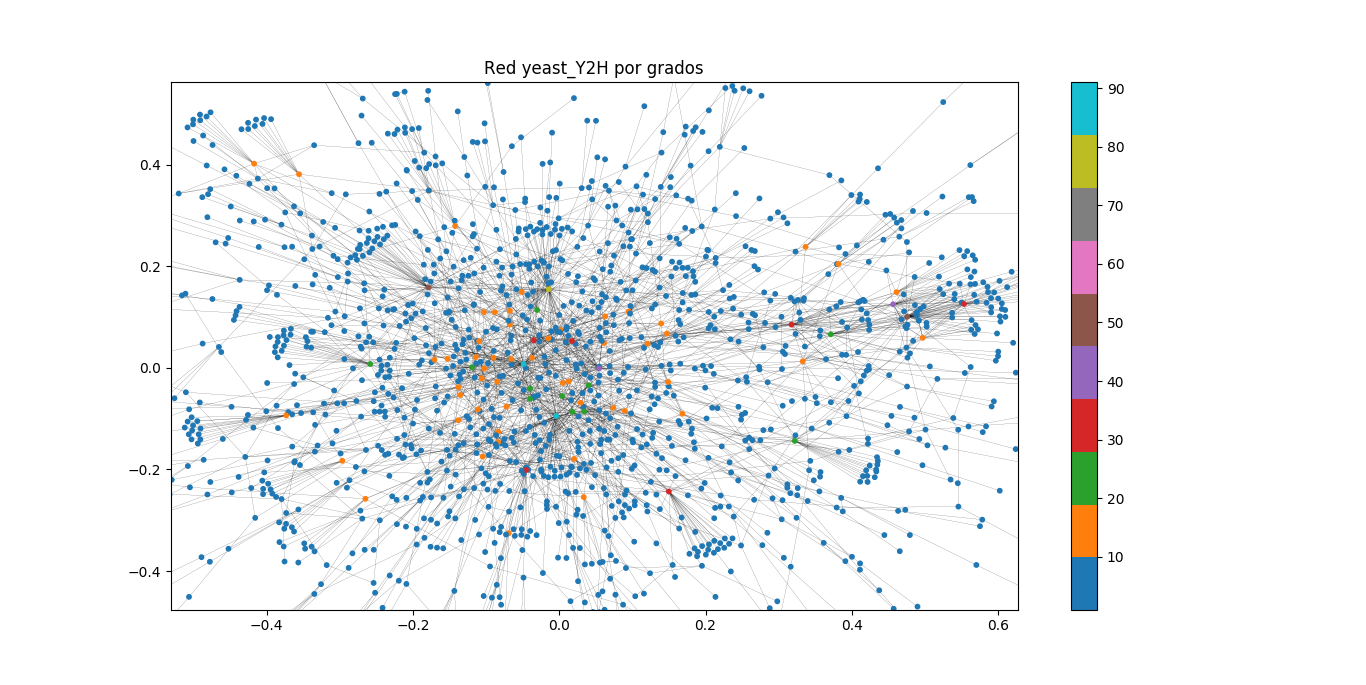

In [10]:
Image(filename='Red_Y2H/Red Y2H-cg-2.png')

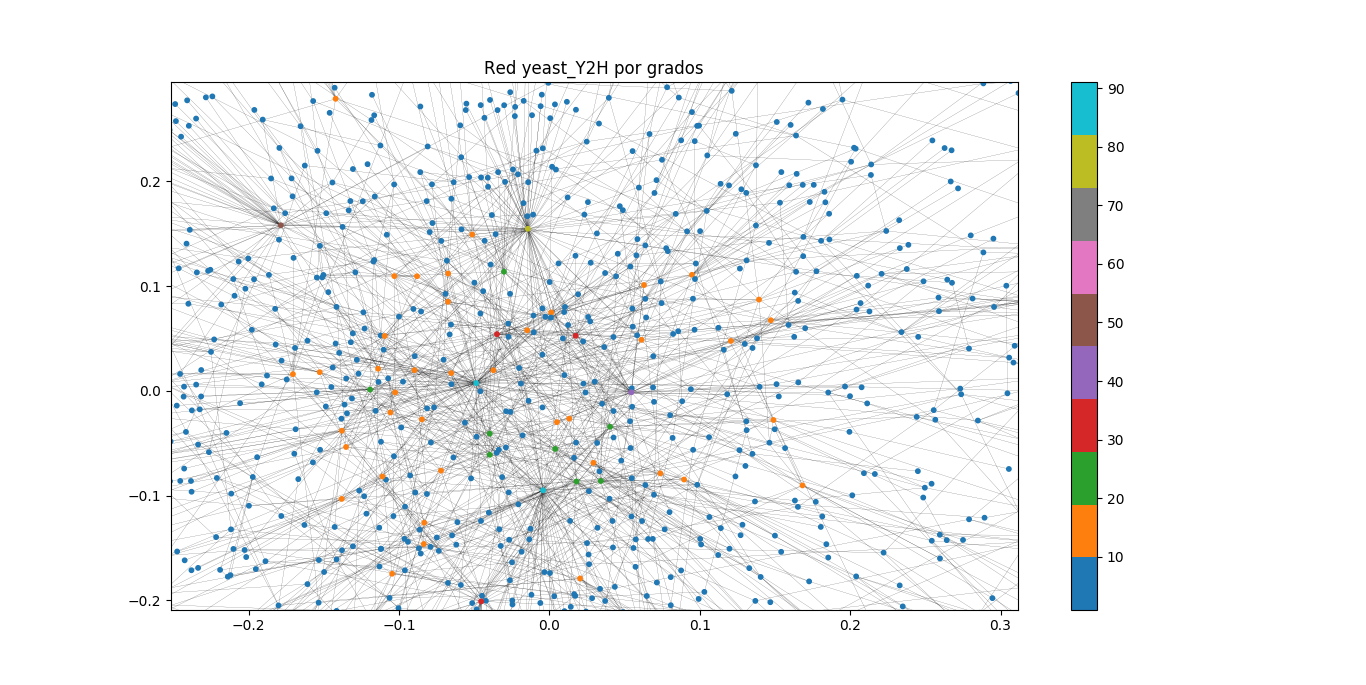

In [12]:
Image(filename='Red_Y2H/Red Y2H-cg-3.png')

Por último se ve que ambos coeficientes muestran que la red de AP-MS es del tipo Asortiva. En los siguientes gráficos se muestran zonas de la red donde hay una alta clusterización y además se ve que los nodos se unen a nodos de igual grado lo cual se corresponde con una asortatividad positiva.

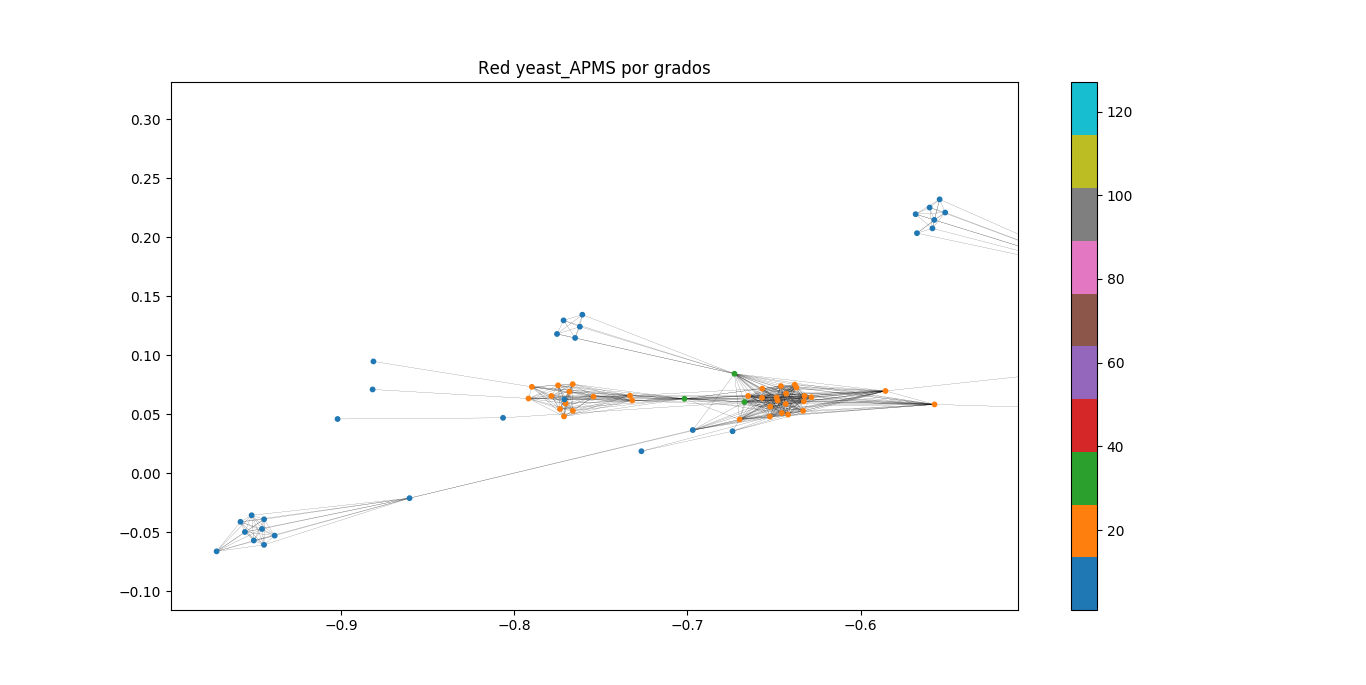

In [13]:
Image(filename='Red_APMS/Red AP-MS-cg-2.png')

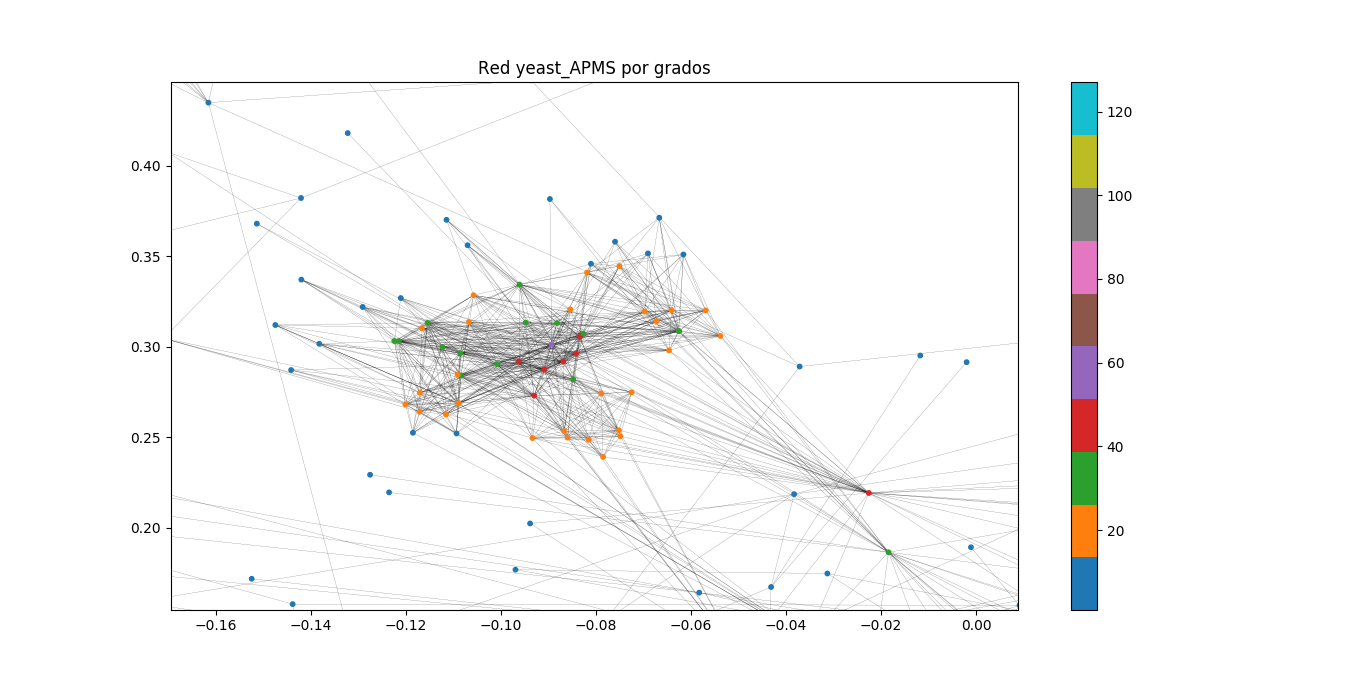

In [16]:
Image(filename='Red_APMS/Red AP-MS-cg-3.png')

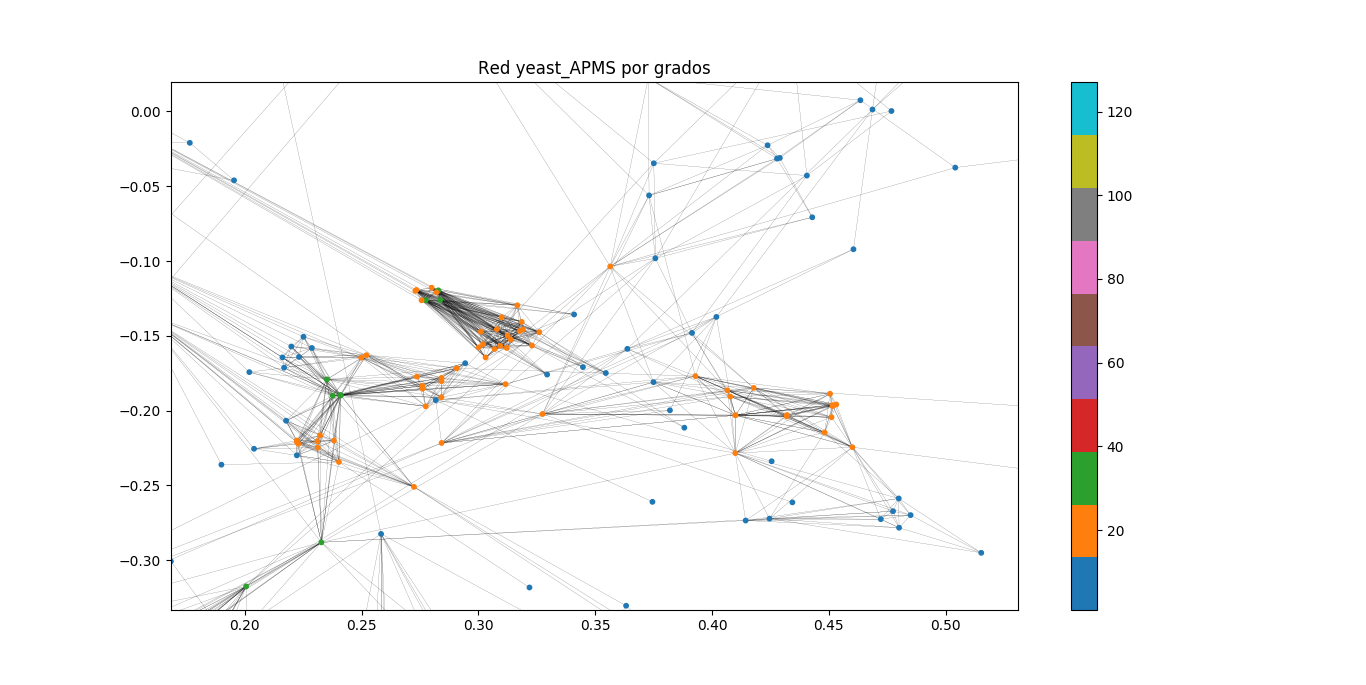

In [17]:
Image(filename='Red_APMS/Red AP-MS-cg-4.png')

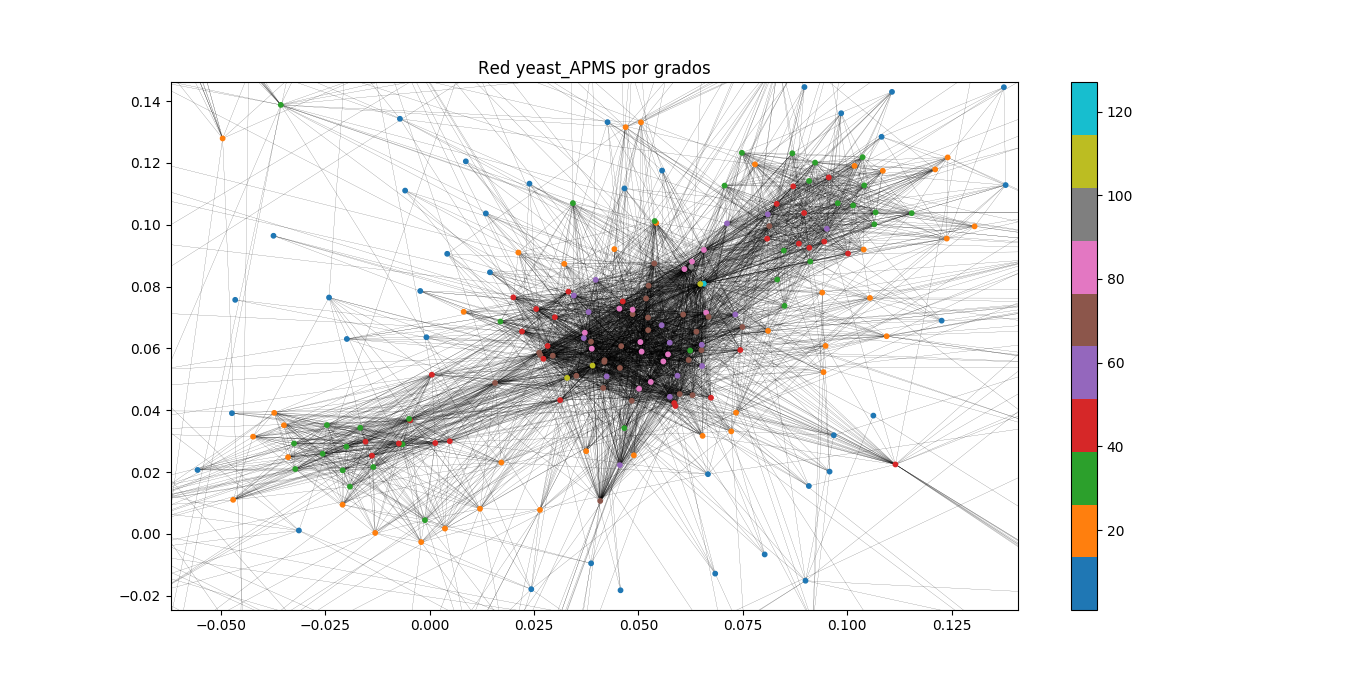

In [18]:
Image(filename='Red_APMS/Red AP-MS-cg-5.png')